In [ ]:
# Install necessary libraries (if not installed)
!pip install numpy==1.26.4 pandas nltk seaborn matplotlib wordcloud transformers torch datasets scikit-learn joblib wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 758.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
from transformers import AutoTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import joblib
import wandb
from datasets import Dataset, DatasetDict
from huggingface_hub import login
import ssl

In [3]:

# Fix SSL issues for downloading NLTK data
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download necessary NLTK resources
nltk.download(['punkt', 'stopwords', 'wordnet', 'omw-1.4'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
# Load dataset
data = pd.read_csv("output.csv")

In [5]:
# Ensure correct column names
data.rename(columns=lambda x: x.strip(), inplace=True)  # Removes any extra spaces in column names


In [6]:
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Text Cleaning Function
def clean_text(text):
    try:
        # Convert to string if not already
        text = str(text)

        # Basic cleaning
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenization with error handling
        try:
            tokens = word_tokenize(text)
        except LookupError:
            # Fallback tokenization if word_tokenize fails
            tokens = text.split()

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {e}")
        return text  # Return original text if processing fails


# Process the data
try:
    data['Cleaned_Review'] = data['Review'].apply(clean_text)
except Exception as e:
    print(f"Error processing dataframe: {e}")

In [9]:
# Display some cleaned reviews
print("Original vs Cleaned Review Comparison:")
for i in range(3):  # Show first 3 rows
    print("\nOriginal:", data['Review'].iloc[i])
    print("Cleaned :", data['Cleaned_Review'].iloc[i])


Original vs Cleaned Review Comparison:

Original: Wow... Loved this place.
Cleaned : wow loved place

Original: Crust is not good.
Cleaned : crust good

Original: Not tasty and the texture was just nasty.
Cleaned : tasty texture nasty


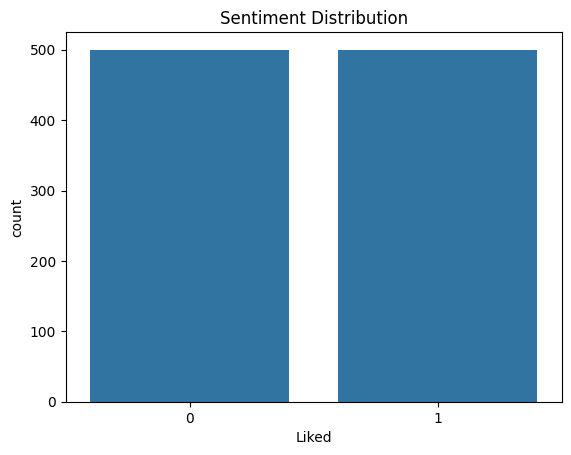

In [10]:
# Visualize sentiment distribution
sns.countplot(x=data['Liked'])
plt.title("Sentiment Distribution")
plt.show()


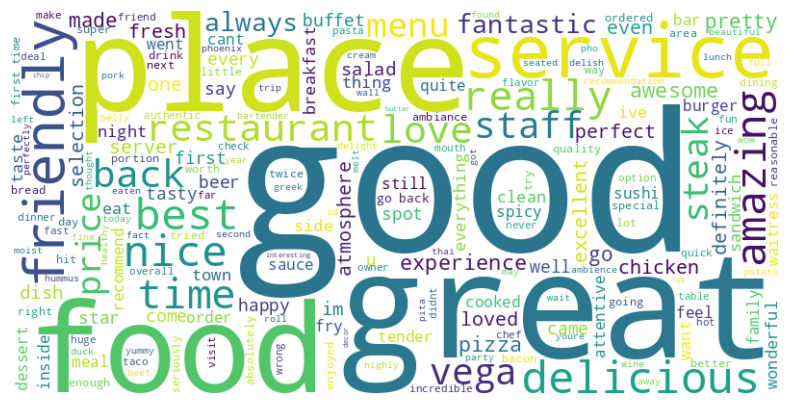

In [11]:
# Word Cloud for Positive Reviews
positive_reviews = ' '.join(data[data['Liked'] == 1]['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Review'], data['Liked'], test_size=0.2, random_state=42)


In [13]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Save the TF-IDF vectorizer for future use
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("TF-IDF Vectorizer saved successfully!")

TF-IDF Vectorizer saved successfully!


In [15]:
# Train ML Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(kernel='linear')
}

In [16]:
# Training and Evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        96
           1       0.82      0.73      0.77       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200


Training Random Forest...
Random Forest Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        96
           1       0.81      0.55      0.66       104

    accuracy                           0.70       200
   macro avg       0.73      0.71      0.69       200
weighted avg       0.73      0.70      0.69       200


Training SVM...
SVM Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        96
           1       0.85      0.72      0.78       104

    accuracy          

In [17]:
# Save trained ML models
joblib.dump(models["Logistic Regression"], "logistic_regression_model.pkl")
joblib.dump(models["Random Forest"], "random_forest_model.pkl")
joblib.dump(models["SVM"], "svm_model.pkl")
print("ML models saved successfully!")

ML models saved successfully!


In [18]:
# Function to Test Models on New Reviews
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    vectorizer = joblib.load("tfidf_vectorizer.pkl")  # Load saved vectorizer
    review_tfidf = vectorizer.transform([review_cleaned])  # Transform input review

    # Load trained models
    logistic_model = joblib.load("logistic_regression_model.pkl")
    random_forest_model = joblib.load("random_forest_model.pkl")
    svm_model = joblib.load("svm_model.pkl")

    # Get predictions
    log_pred = logistic_model.predict(review_tfidf)[0]
    rf_pred = random_forest_model.predict(review_tfidf)[0]
    svm_pred = svm_model.predict(review_tfidf)[0]

    result = {
        "Review": review,
        "Cleaned Review": review_cleaned,
        "Logistic Regression Prediction": "Positive" if log_pred == 1 else "Negative",
        "Random Forest Prediction": "Positive" if rf_pred == 1 else "Negative",
        "SVM Prediction": "Positive" if svm_pred == 1 else "Negative",
    }
    return result

# Example Queries for Testing the Models
sample_reviews = [
    "The hotel service was excellent, and the food was delicious!",
    "Terrible experience! The room was dirty and the staff was rude.",
    "It was an okay stay. The location was good but the food was average.",
]

In [19]:
# Test Predictions
for review in sample_reviews:
    result = predict_sentiment(review)
    print("\nReview:", result["Review"])
    print("Cleaned Review:", result["Cleaned Review"])
    print("Logistic Regression:", result["Logistic Regression Prediction"])
    print("Random Forest:", result["Random Forest Prediction"])
    print("SVM:", result["SVM Prediction"])
    print("=" * 50)


Review: The hotel service was excellent, and the food was delicious!
Cleaned Review: hotel service excellent food delicious
Logistic Regression: Positive
Random Forest: Positive
SVM: Positive

Review: Terrible experience! The room was dirty and the staff was rude.
Cleaned Review: terrible experience room dirty staff rude
Logistic Regression: Negative
Random Forest: Negative
SVM: Negative

Review: It was an okay stay. The location was good but the food was average.
Cleaned Review: okay stay location good food average
Logistic Regression: Negative
Random Forest: Positive
SVM: Negative


In [20]:
!pip install transformers datasets torch scikit-learn wandb

In [21]:
# Initialize Weights & Biases
wandb.login()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: samruddhiingole77 (samruddhiingole77-ramdeobaba-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [22]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [23]:
# Tokenize function
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)


In [25]:
# Your existing dataset split
X_train = X_train.tolist()  # Convert Pandas Series to list
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()


In [26]:
# Tokenizing dataset
train_encodings = tokenize_function(X_train)
test_encodings = tokenize_function(X_test)


In [27]:
# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": y_train
})

test_dataset = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"],
    "attention_mask": test_encodings["attention_mask"],
    "labels": y_test
})

In [28]:
# Load pre-trained BERT model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_checkpoints",      # Checkpoint directory
    evaluation_strategy="epoch",          # Evaluate at every epoch
    save_strategy="epoch",                # Save model at each epoch
    save_total_limit=1,                    # Keep only the best checkpoint
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=100,                 # Train for 100 epochs
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="wandb",                     # Log to Weights & Biases
    load_best_model_at_end=True,           # Automatically load best model
    metric_for_best_model="eval_loss",     # Best model based on validation loss
    greater_is_better=False,               # Lower eval_loss is better
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train model
trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.604900,0.503449
2,0.330300,0.497976
3,0.179100,0.571412
4,0.096500,0.725872
5,0.051000,0.961400
6,0.031800,1.085767
7,0.029700,1.058944
8,0.019000,1.040663
9,0.007700,1.193709
10,0.014600,1.244835


TrainOutput(global_step=5000, training_loss=0.018281359681487083, metrics={'train_runtime': 5317.2009, 'train_samples_per_second': 15.046, 'train_steps_per_second': 0.94, 'total_flos': 1.059739189248e+16, 'train_loss': 0.018281359681487083, 'epoch': 100.0})

In [30]:
# Evaluate the model
metrics = trainer.evaluate()
print("✅ Model Evaluation Metrics:", metrics)

# Extract accuracy (since Hugging Face does not provide accuracy directly)
from sklearn.metrics import accuracy_score

# Get predictions
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1).numpy()
labels = y_test  # True labels

# Compute accuracy
accuracy = accuracy_score(labels, preds)
print(f"✅ Model Accuracy: {accuracy:.4f}")


✅ Model Evaluation Metrics: {'eval_loss': 0.49797552824020386, 'eval_runtime': 3.472, 'eval_samples_per_second': 57.603, 'eval_steps_per_second': 3.744, 'epoch': 100.0}
✅ Model Accuracy: 0.8000


In [31]:
# Save the best model
trainer.save_model("./best_bert_model")
print("✅ Best BERT model saved successfully!")


✅ Best BERT model saved successfully!


In [32]:
!zip -r best_bert_model.zip best_bert_model/
from google.colab import files
files.download("best_bert_model.zip")


  adding: best_bert_model/ (stored 0%)
  adding: best_bert_model/config.json (deflated 46%)
  adding: best_bert_model/model.safetensors (deflated 8%)
  adding: best_bert_model/training_args.bin (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
def predict_sentiment(review, model_path="./best_bert_model"):
    # Load saved model & tokenizer
    model = DistilBertForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    # Preprocess input
    inputs = tokenizer(review, return_tensors="pt", padding="max_length", truncation=True, max_length=512)

    # Perform inference
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)

    # Get prediction
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()

    # Return sentiment
    return "Positive 😊" if prediction == 1 else "Negative 😞"

# Sample predictions
print(predict_sentiment("The food was absolutely delicious and the service was excellent!"))
print(predict_sentiment("The room was dirty and the staff was very rude."))


Positive 😊
Negative 😞
